## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merge_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df.head()
merge_df["Tumor Volume (mm3)"].describe()
merge_df["Tumor Volume (mm3)"].sem()
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1



## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_df=merge_df.drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Tumor Volume (mm3)'])
bar_df.head()


,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane


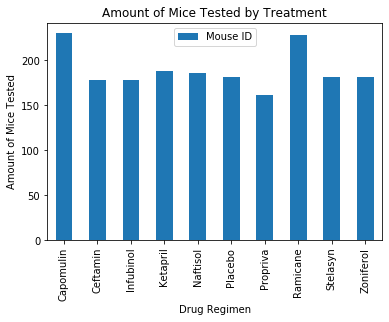

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_bar_df=bar_df.groupby(['Drug Regimen']).agg({'Mouse ID': 'count'})
pandas_bar_df.plot(kind= "bar",title='Amount of Mice Tested by Treatment')
plt.ylabel('Amount of Mice Tested')
plt.show()

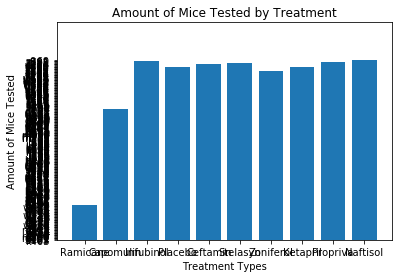

In [21]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug= bar_df["Drug Regimen"]
mice= bar_df['Mouse ID']
plt.bar(drug, mice)
plt.title('Amount of Mice Tested by Treatment')
plt.xlabel('Treatment Types')
plt.ylim(0, 300)
plt.ylabel('Amount of Mice Tested')
plt.show()

## Pie plots

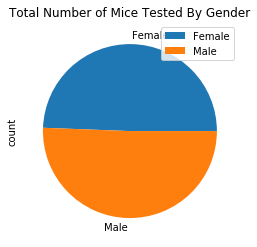

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df= merge_df.drop(columns=['Drug Regimen','Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', 'Tumor Volume (mm3)'])

gender_df.head()
gender_df = gender_df.groupby(['Sex']).agg({'Mouse ID' : 'count'})
gender_df = gender_df.rename(columns={'Mouse ID': 'count'})
gender_df.plot(kind='pie', y='count' , title='Total Number of Mice Tested By Gender')#p

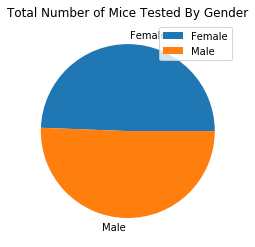

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= 'Female', 'Male'
plt.pie(gender_df['count'],labels=labels)
plt.title("Total Number of Mice Tested By Gender")
plt.legend()
plt.show()



## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
results_df=merge_df.drop(columns=['Sex','Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites', "Mouse ID"])
results_df.head()
tumor_volume_df=results_df["Tumor Volume (mm3)"]
tumor_volume_df.mean()
treatment_name= results_df['Drug Regimen']
# #temp data frame
temp_df = results_df.groupby("Tumor Volume (mm3)")
# # Calculates the average tumor volume for each drug
avg_volume = temp_df["Tumor Volume (mm3)"].mean()
tumor_volume_df = pd.DataFrame({"Avg Tumor Volume" : avg_volume, "Treatment Name": treatment_name})
best_drug = tumor_volume_df.sort_values("Treatment Name").nsmallest(4,"Avg Tumor Volume").index.tolist()
best_drug 

[22.05012627, 23.34359787, 24.36550471, 25.47214326]

In [19]:
# IQR and Outliers
r_treat= results_df[results_df['Drug Regimen']=='Ramicane']
cap_treat= results_df[results_df['Drug Regimen']=='Capomulin']
prop_treat=results_df[results_df['Drug Regimen']=='Propriva']
ceft_treat=results_df[results_df['Drug Regimen']=='Ceftamin']
treatment_data=[r_treat, cap_treat, prop_treat, ceft_treat]
for treatment in treatment_data:
    quart = treatment_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lower_quart = quantile[0.25]
    upper_quart = quantile[0.75]
    iqr = upper_quart-lower_quart

    low_outlier = lower_quart - (1.5*iqr)
    high_outlier = upper_quart + (1.5*iqr)
    print(f'The interquartile range for {treatment} is {iqr}')



TypeError: list indices must be integers or slices, not str

adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  snap: bool

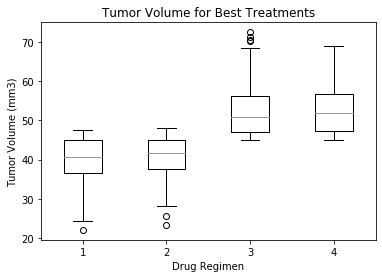

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#creating a function to look through all data frames to find the quartiles

fig, axes = plt.subplots()
list = [r_treat["Tumor Volume (mm3)"], cap_treat["Tumor Volume (mm3)"], prop_treat["Tumor Volume (mm3)"], ceft_treat["Tumor Volume (mm3)"]]
bplot = axes.boxplot(list, vert = True)

plt.setp(axes)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.title("Tumor Volume for Best Treatments")
plt.show()

## Line and scatter plots

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#reworked this section after working on the project, Kyle showed me how to make this more efficient
treatment_cap_df= merge_df[merge_df["Drug Regimen"]=='Capomulin']

treatment_cap_group= treatment_cap_df.groupby("Timepoint")
average_tumor= treatment_cap_group["Tumor Volume (mm3)"].mean()
cap_df=pd.DataFrame({'Average Tumor Volume': average_tumor})
cap_df.head()


,Average Tumor Volume
Timepoint,
0,45.000000
5,44.266086
10,43.084291
15,42.064317
20,40.716325


Text(0.5, 1.0, 'Average Tumor Size Over Time with Capomulin')

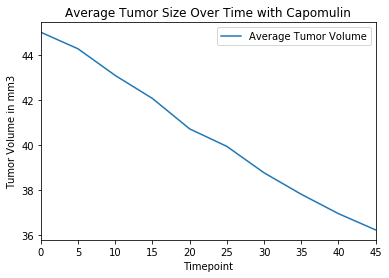

In [11]:
cap_df.plot(kind="line")
plt.ylabel("Tumor Volume in mm3")
plt.title('Average Tumor Size Over Time with Capomulin')

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume using Capomlin')

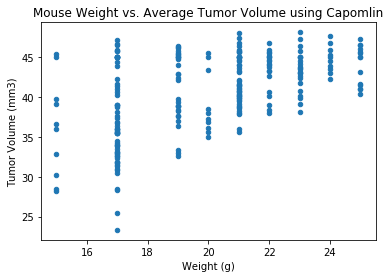

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
treatment_cap_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume using Capomlin")

In [13]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x = treatment_cap_df["Weight (g)"]
y = treatment_cap_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression = x * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line)

y = 0.96x + 21.49
